# Import Data and Packages

## Packages

In [1]:
!pip install cpi

In [2]:
import pandas as pd
import plotly.graph_objects as go
import plotly.graph_objects as go
import cpi
cpi.update()

## Data

In [7]:
bud = pd.read_csv('../Assets/Revenues, Outlays, Deficits, Surpluses, and Debt Held by the Public - Sheet1.csv')

# Remove newline char from columns
bud.columns = [col.replace("\n", "") for col in bud.columns]

# Set index to years
bud = bud.set_index('Year')

bud['Postal Service (Deficit (-) or Surplus)'] = bud['Postal Service (Deficit (-) or Surplus)'].replace('n.a', 0)

bud.head()

,Revenues,Outlays,On-Budget (Deficit (-) or Surplus),Social Security (Deficit (-) or Surplus),Postal Service (Deficit (-) or Surplus),Total (Deficit (-) or Surplus),Debt Held by the Public
Year,,,,,,,
1962,99.7,106.8,-5.9,-1.3,0,-7.1,248.0
1963,106.6,111.3,-4.0,-0.8,0,-4.8,254.0
1964,112.6,118.5,-6.5,0.6,0,-5.9,256.8
1965,116.8,118.2,-1.6,0.2,0,-1.4,260.8
1966,130.8,134.5,-3.1,-0.6,0,-3.7,263.7


In [16]:
sur_def = bud['Total (Deficit (-) or Surplus)'].to_list()

In [20]:
surplus = []
deficit = []

years = range(1962, 2020)

for i in range(len(years)):
    value = sur_def[i]
    adj_value = cpi.inflate(value, years[i])
    if adj_value > 0:
        surplus.append(adj_value)
        deficit.append(0)
    elif adj_value < 0:
        surplus.append(0)
        deficit.append(adj_value)

[]

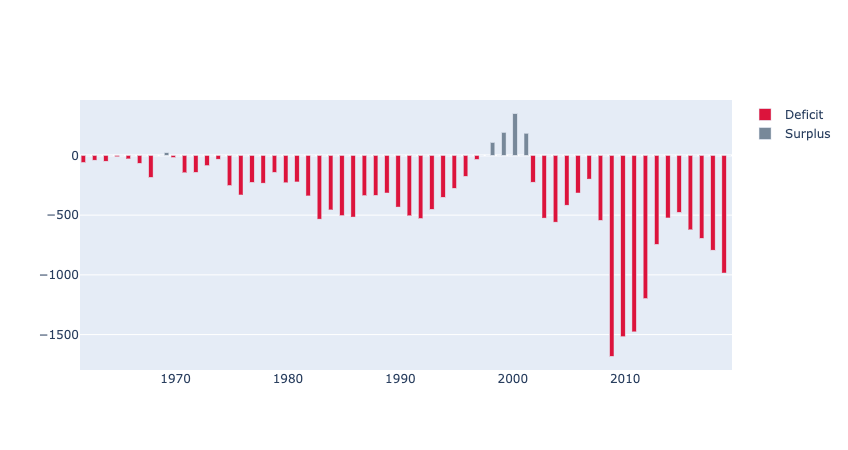

In [24]:
import plotly.graph_objects as go

years = bud.index

fig = go.Figure()

fig.add_trace(go.Bar(x = years, y = [-1 * i for i in deficit],
                base = deficit,
                marker_color = 'crimson',
                name = 'Deficit'))

fig.add_trace(go.Bar(x = years, y = surplus,
                base = 0,
                marker_color = 'lightslategrey',
                name = 'Surplus'
                ))

fig.show()

In [25]:
bud.columns

Index(['Revenues', 'Outlays', 'On-Budget (Deficit (-) or Surplus)',
       'Social Security (Deficit (-) or Surplus)',
       'Postal Service (Deficit (-) or Surplus)',
       'Total (Deficit (-) or Surplus)', 'Debt Held by the Public'],
      dtype='object')

In [40]:
revenues = bud['Revenues'].to_list()
revs = []

for i in range(len(revenues)):
    #print(revenues[i], revenues[i - 1])
    revs.append(((revenues[i] - revenues[i - 1]) / revenues[i - 1]) * 100)

outlays = bud['Outlays'].to_list()
outs = []
for i in range(len(outlays)):
    #print(outlays[i], outlays[i - 1])
    outs.append(((outlays[i] - outlays[i - 1]) / outlays[i - 1]) * 100)


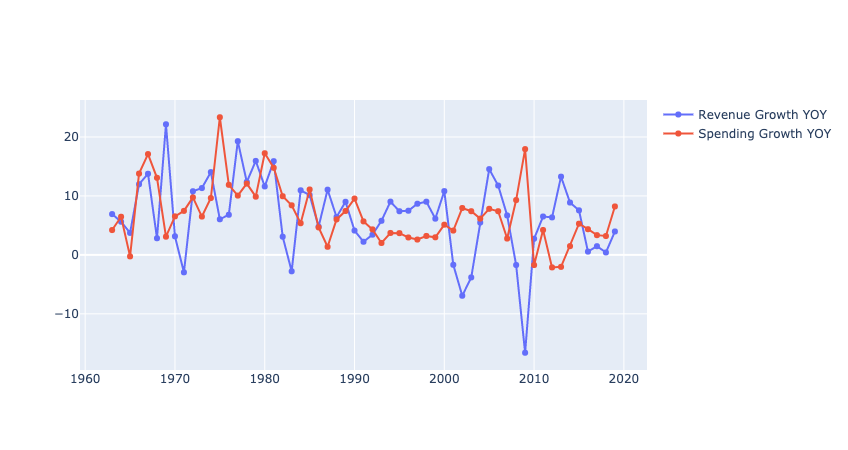

In [44]:
years = bud.index.to_list()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x = years[1:],
    y = revs[1:],
    mode = 'lines+markers',
    name = 'Revenue Growth YOY'))

fig.add_trace(go.Scatter(
    x = years[1:],
    y = outs[1:],
    mode = 'lines+markers',
    name = 'Spending Growth YOY'))

fig.show()